In [9]:
# view all the mutation distortion maps for structural validation.
#See how changing between amino acids effects RMSD as an average over all positions
import os
from Bio import SeqIO
import sys
sys.path.append('/mnt/ncshare/ozkilim/covid/covid_landscape/SARS2_RBD_Ab_escape_maps')
from bindingcalculator import BindingCalculator
from biopandas.pdb import PandasPdb
from scipy.spatial import distance_matrix
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm
import matplotlib.patches as mpatches

(3819, 2)
(3819, 2)
(3819, 2)
(3819, 2)
(3819, 2)
(3819, 2)


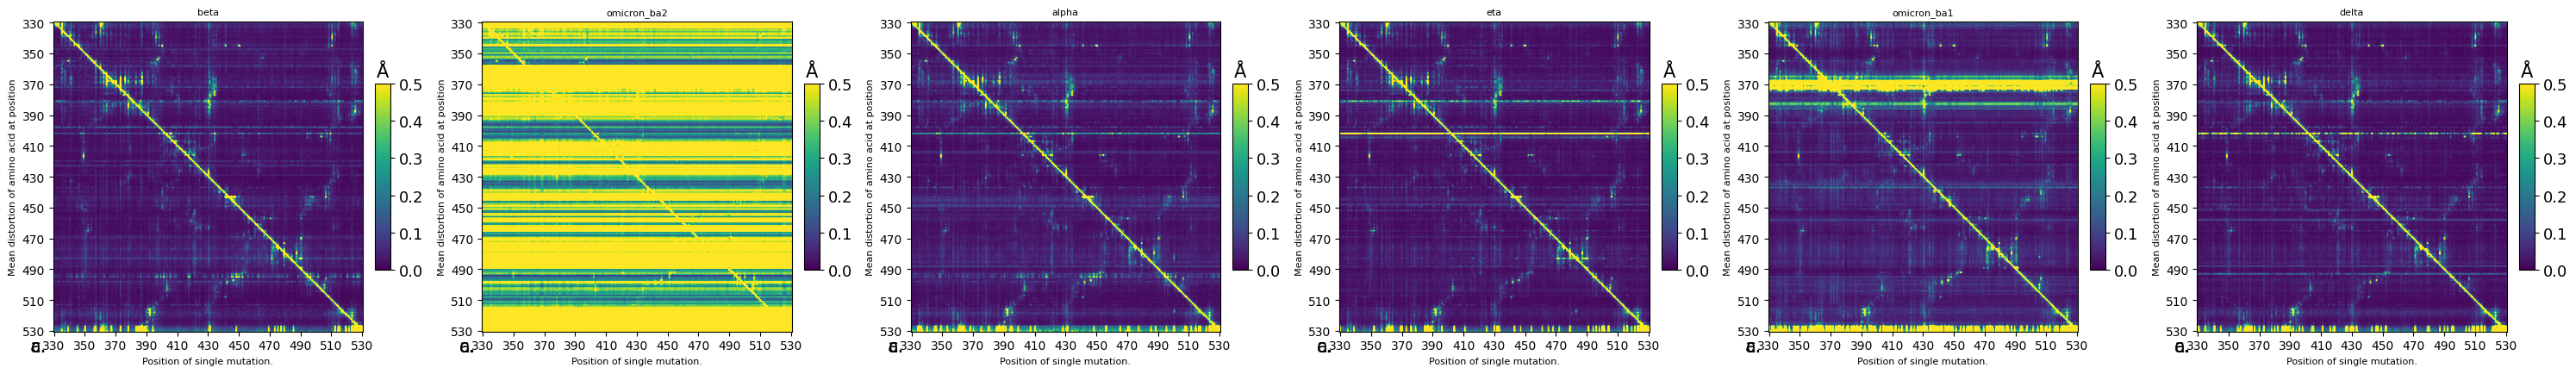

In [10]:
# plot to show local structural change is close in 3D space... 
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition

f, axes = plt.subplots(1, 6,figsize=(30, 7), dpi=100)

directory = "./mutation_distortion_maps"

for idx, filename in enumerate(os.listdir(directory)):
   
    file_path = os.path.join(directory, filename)
    var_name = filename[:-4]
    interaction_mat = np.load(file_path,allow_pickle=True)
    print(interaction_mat.shape)

    df1 = pd.DataFrame(interaction_mat,columns =["pos","effect"])
    df2 = pd.DataFrame(df1["effect"].to_list())
    df1 = df1.groupby(['pos']).mean().unstack(fill_value=0) #did it mean values inside lists?... 
    df1 = pd.DataFrame(df1["effect"].to_list())
    colors = axes[idx].imshow(df1.T)
    axes[idx].set_title(var_name,fontsize=8)
    axes[idx].set_ylabel('Mean distortion of amino acid at position',fontsize=8)
    axes[idx].set_xlabel('Position of single mutation.',fontsize=8)
    axes[idx].set_xticks(range(0,201,20),range(330,531,20)) #change labels..
    axes[idx].set_yticks(range(0,201,20),range(330,531,20)) #change labels..
    axes[idx].text(-10, 210, 'a.', ha='center', va='center', color='black',fontsize=15)
    cax = axes[idx].inset_axes([1.04, 0.2, 0.05, 0.6])
    axes[idx].text(-10, 210, 'c.', ha='center', va='center', color='black',fontsize=15)
    clb = plt.colorbar(colors, ax=axes[0],shrink=5,cax=cax)
    clb.ax.tick_params(labelsize=13) 
    clb.ax.set_title('Å',fontsize=15)
    plt.tight_layout()
    
plt.show()
# f.savefig("../reasults_figs/distortion_thresholded.png",bbox_inches='tight',facecolor="white",dpi=500)